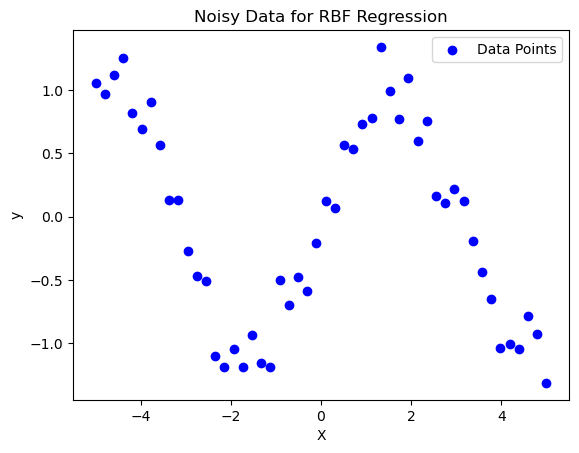

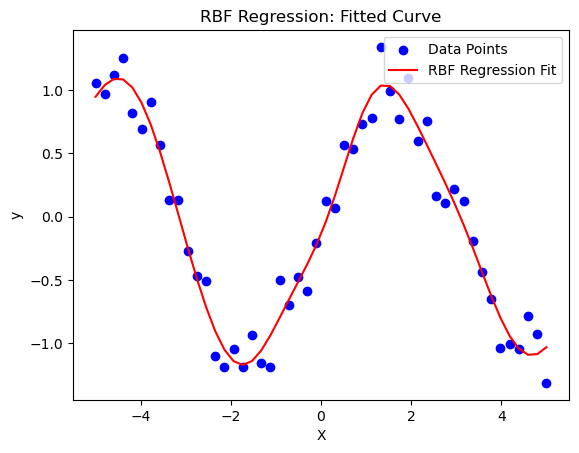

Mean Squared Error (MSE): 0.0262


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import mean_squared_error

# Define RBF Kernel
def rbf_kernel(X, centers, sigma):
    """
    Compute the RBF kernel matrix.
    X: Input data points (n_samples, n_features)
    centers: RBF centers (n_centers, n_features)
    sigma: Spread parameter for the RBFs
    Returns:
        Kernel matrix (n_samples, n_centers)
    """
    return np.exp(-cdist(X, centers)**2 / (2 * sigma**2))

# Implement RBF Regression
class RBFRegression:
    def __init__(self, num_centers, sigma):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def fit(self, X, y):
        # Step 3.1: Select RBF centers randomly
        random_indices = np.random.choice(X.shape[0], self.num_centers, replace=False)
        self.centers = X[random_indices]

        # Step 3.2: Compute RBF kernel matrix
        phi = rbf_kernel(X, self.centers, self.sigma)

        # Step 3.3: Solve for weights using the pseudo inverse
        self.weights = np.linalg.pinv(phi).dot(y)

    def predict(self, X):
        # Step 3.4: Compute RBF kernel matrix for new inputs
        phi = rbf_kernel(X, self.centers, self.sigma)
        return phi.dot(self.weights)

# Step 1: Generate Sample Data
np.random.seed(42)
X = np.linspace(-5, 5, 50).reshape(-1, 1)  # Input data points
y = np.sin(X).ravel() + np.random.normal(scale=0.2, size=X.shape[0])  # Noisy target values

# Visualize the data
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Noisy Data for RBF Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Step 2: Train and Test the Model
num_centers = 10  # Number of RBF centers
sigma = 1.0       # Spread of RBFs
model = RBFRegression(num_centers, sigma)

# Fit the model to the training data
model.fit(X, y)

# Step 3: Make Predictions
# Predict the output for the training data
y_pred = model.predict(X)

# Visualize the Results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='RBF Regression Fit')
plt.title("RBF Regression: Fitted Curve")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Step 4: Evaluate the Model
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")